In [3]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [18]:
df = pd.read_csv("../data/adult.csv")

del df["Unnamed: 0"]
df = df[~df.isin(["?"]).any(axis=1)].reset_index(drop=True)

invalid_salary = df[
    (df["salary"] == "<=50K") & (df["salary K$"] > 50)
    | (df["salary"] == ">50K") & (df["salary K$"] <= 50)
]
invalid_salary

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


# Task 1
Print the count of men and women in the dataset.

In [19]:
gender_counts = df["sex"].value_counts()
gender_counts

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [20]:
average_age_men = df[df["sex"] == "Male"]["age"].mean()
average_age_men

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [21]:
total_people = len(df)
poland_people = df[df["native-country"] == "Poland"].shape[0]
percentage_poland = (poland_people / total_people) * 100
percentage_poland

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [24]:
mean_age_above_50k = df[df["salary"] == ">50K"]["age"].mean()
std_age_above_50k = df[df["salary"] == ">50K"]["age"].std()

mean_age_below_or_equal_50k = df[df["salary"] == "<=50K"]["age"].mean()
std_age_below_or_equal_50k = df[df["salary"] == "<=50K"]["age"].std()

print(">50K:")
print(
    f"Mean age: {mean_age_above_50k}, "
    f"Standard deviation: {std_age_above_50k}"
)

print("<=50K:")
print(
    f"Mean age: {mean_age_below_or_equal_50k}, "
    f"Standard deviation: {std_age_below_or_equal_50k}"
)

>50K:
Mean age: 43.95911028236548, Standard deviation: 10.269632835673852
<=50K:
Mean age: 36.60806038668668, Standard deviation: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [27]:
higher_education = [
    "Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"
]

non_higher_edu_above_50k = df[
    (~df["education"].isin(higher_education))
    & (df["salary"] == ">50K")
]

non_higher_edu_above_50k

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
51,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
62,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
63,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
30075,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
30125,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
30126,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
30158,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [28]:
age_stats_by_education = df.groupby("education")["age"].describe()
age_stats_by_education

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [30]:
married_men = df[
    (df["sex"] == "Male")
    & (df["marital-status"].str.startswith("Married"))
]
non_married_men = df[
    (df["sex"] == "Male")
    & (~df["marital-status"].str.startswith("Married"))
]

married_men_salaries = married_men["salary"].value_counts()
non_married_men_salaries = non_married_men["salary"].value_counts()

print("Salary comparison for married men:")
print(married_men_salaries)

print("Salary comparison for non-married men:")
print(non_married_men_salaries)

Salary comparison for married men:
salary
<=50K    7052
>50K     5723
Name: count, dtype: int64
Salary comparison for non-married men:
salary
<=50K    6932
>50K      673
Name: count, dtype: int64


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [31]:
max_hours_per_week = df["hours-per-week"].max()
people_working_max_hours = df[
    df["hours-per-week"] == max_hours_per_week
].shape[0]

print(
    f"Maximum hours per week worked by any person: "
    f"{max_hours_per_week}"
)
print(
    f"Number of people working {max_hours_per_week} "
    f"hours per week: {people_working_max_hours}"
)

Maximum hours per week worked by any person: 99
Number of people working 99 hours per week: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

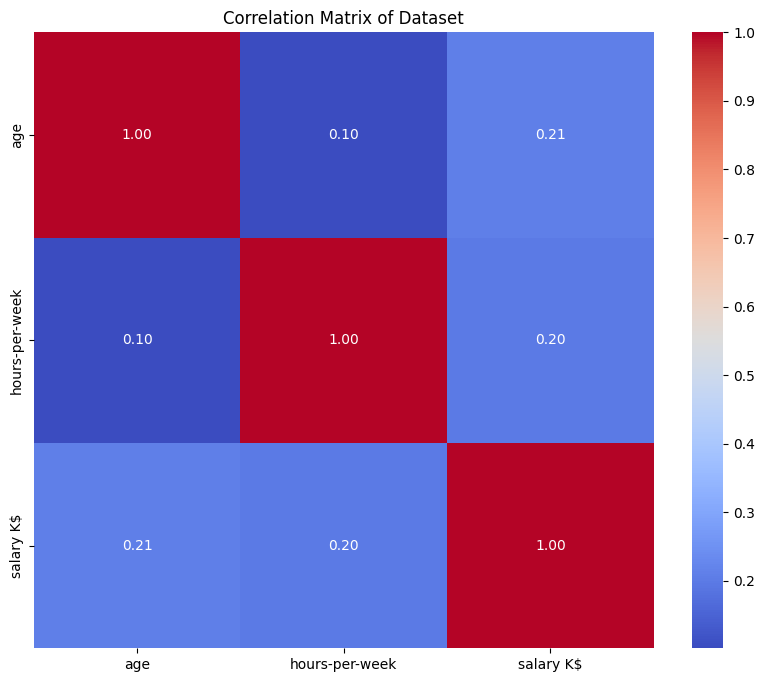

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=["number"])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Dataset")
plt.show()